### Import necessary libraries.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns

### Load data.

In [2]:
life = pd.read_csv("D:/Datasets/Life_Expectancy_Data.csv")
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Checking dimensions.

In [3]:
life.shape

(2938, 22)

### Inspecting datatypes of variables.

In [4]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

### Calculating null percentage of features.

In [5]:
life.isnull().mean()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

***Removing data samples with missing target variable.***

In [6]:
life = life[life['Life expectancy '].isnull()==False]
print(life.shape)
life.head()

(2928, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


***Displaying statistical analysis of variables***

In [7]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


***Visualizing numerical features to check the presence of outliers***

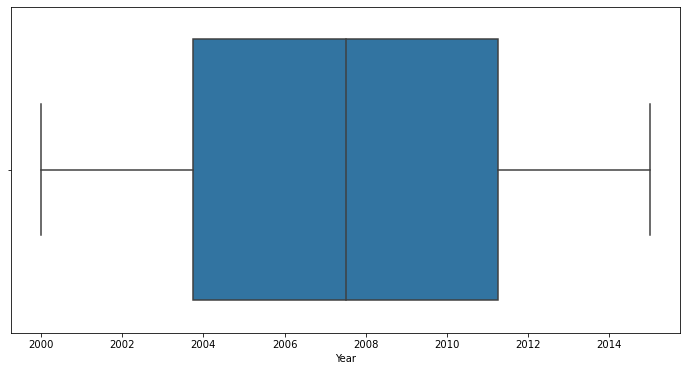

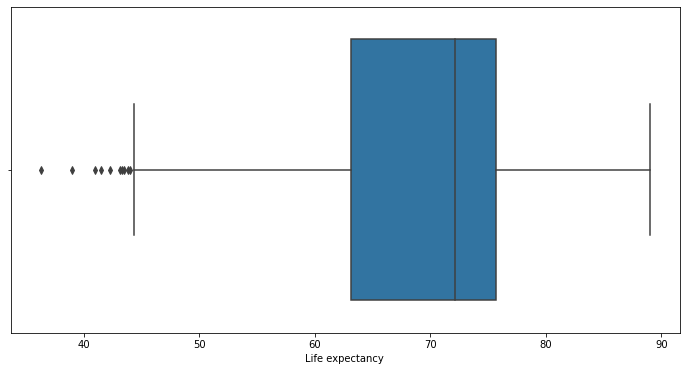

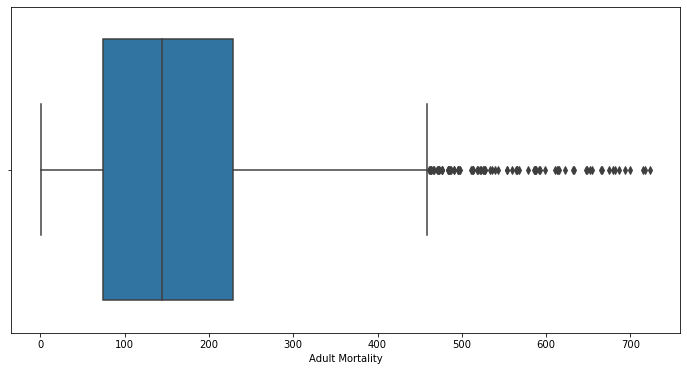

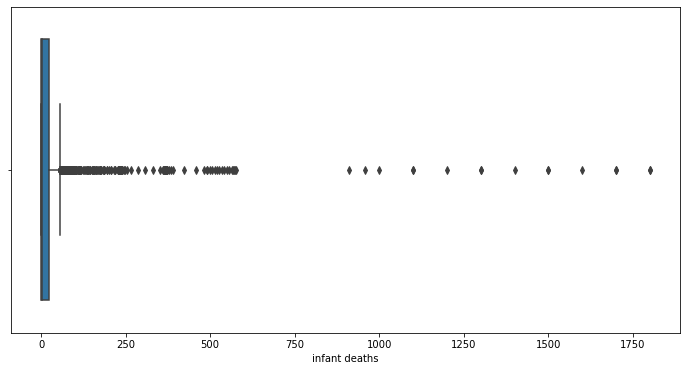

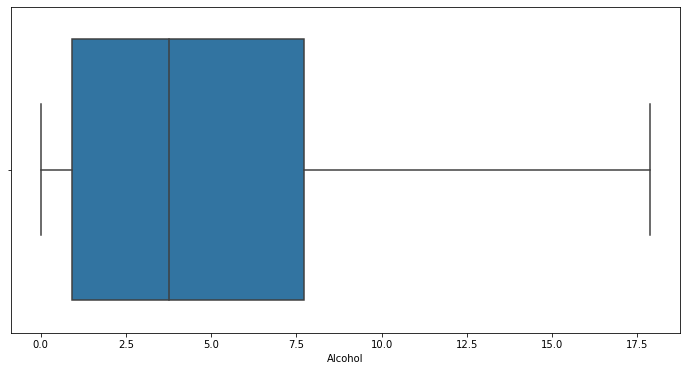

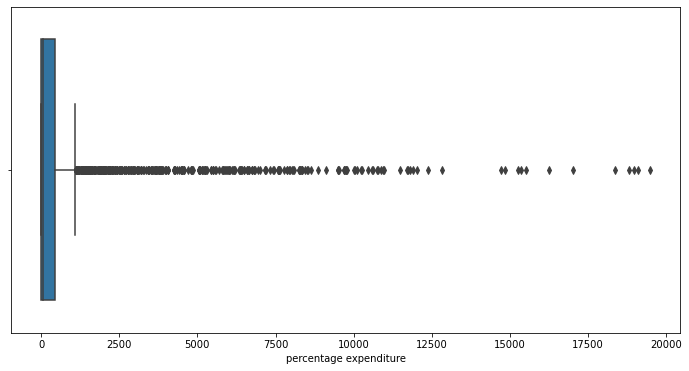

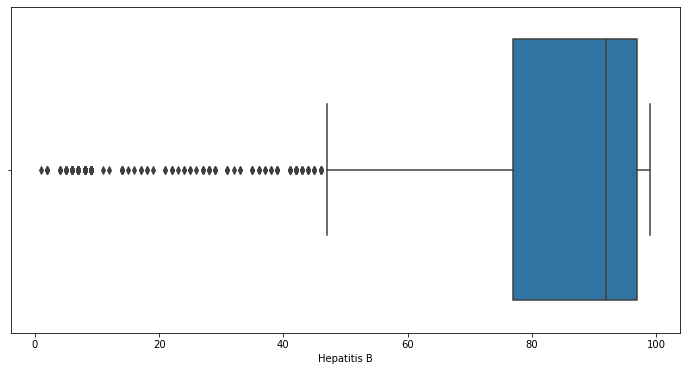

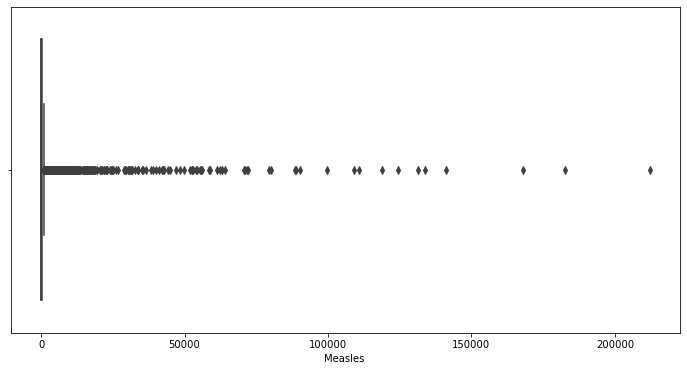

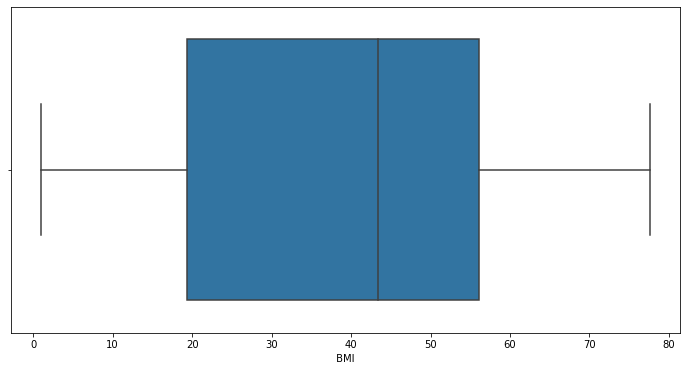

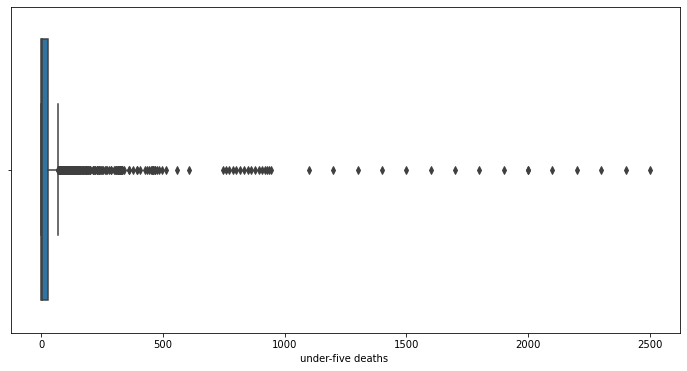

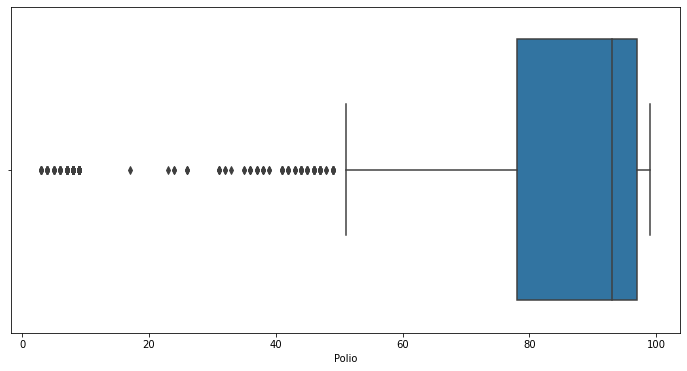

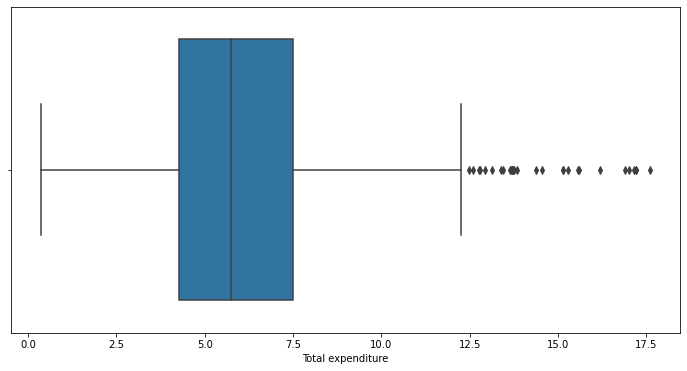

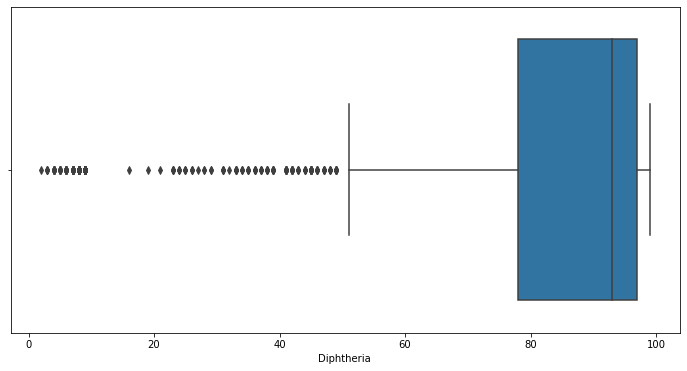

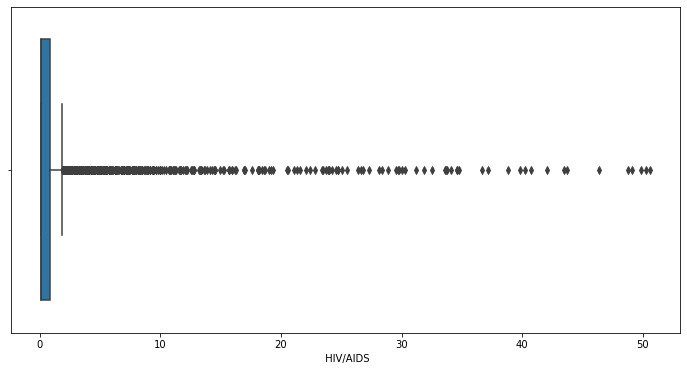

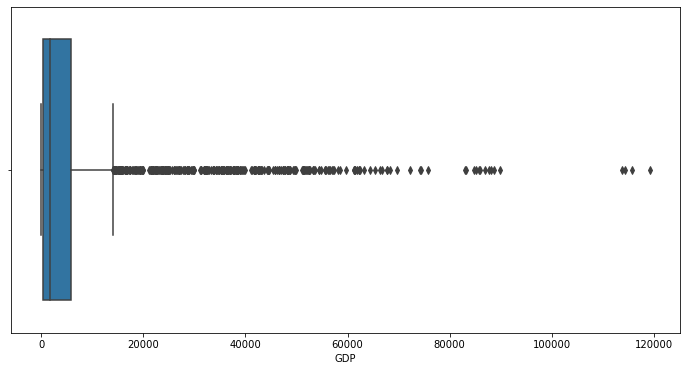

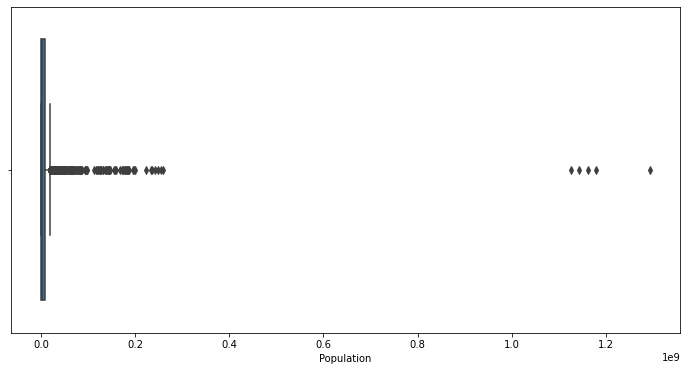

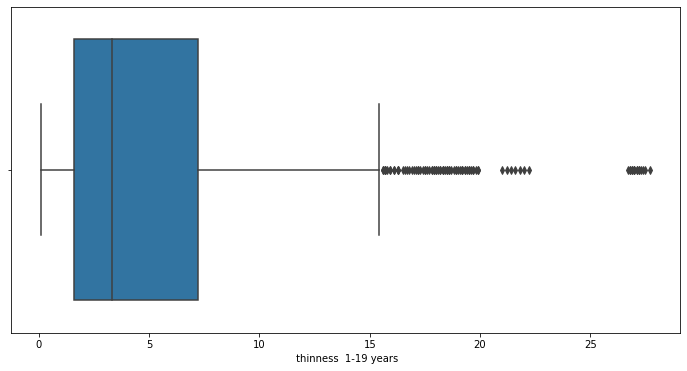

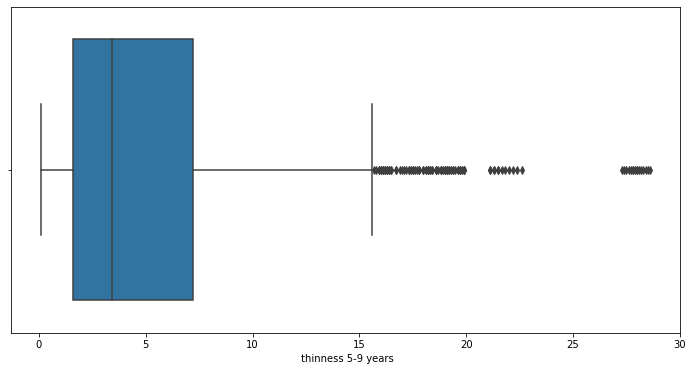

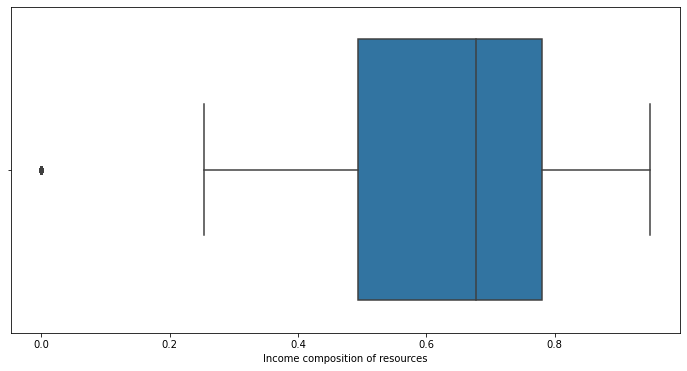

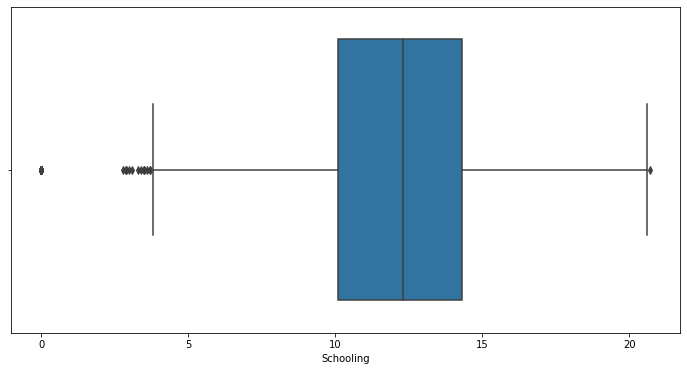

In [8]:
for i in life.select_dtypes(exclude='object'):
    plt.figure(figsize=(12,6))
    sns.boxplot(life[i])
    plt.show()

***Listing out the null-valued columns***

In [9]:
null_cols = life.columns[life.isnull().any()]
null_cols

Index(['Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

***Getting the names of the columns having outliers***

In [10]:
outlier_cols = []
dup_life = pd.DataFrame(life)
for i in dup_life.select_dtypes(exclude='object'):
    IQR = dup_life[i].quantile(0.75) - dup_life[i].quantile(0.25)
    l_bound = dup_life[i].quantile(0.25) - 1.5*IQR
    u_bound = dup_life[i].quantile(0.75) + 1.5*IQR
    dup_life[i] = dup_life[i].fillna(dup_life[i].quantile(0.50))
    if ~dup_life[i].between(l_bound,u_bound).all():
        outlier_cols.append(i)
outlier_cols

['Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

***Imputing missing values***
- with median ( for variables with outliers )
- with mean ( for variables without outliers )

In [11]:
for i in null_cols:
    if i in outlier_cols:
        life[i] = life[i].fillna(life[i].median())
    else:
        life[i] = life[i].fillna(life[i].mean())

***Confirming the absence of missing values***

In [12]:
life.isnull().mean()

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

***Visualizing the correlations between variables using heatmap***

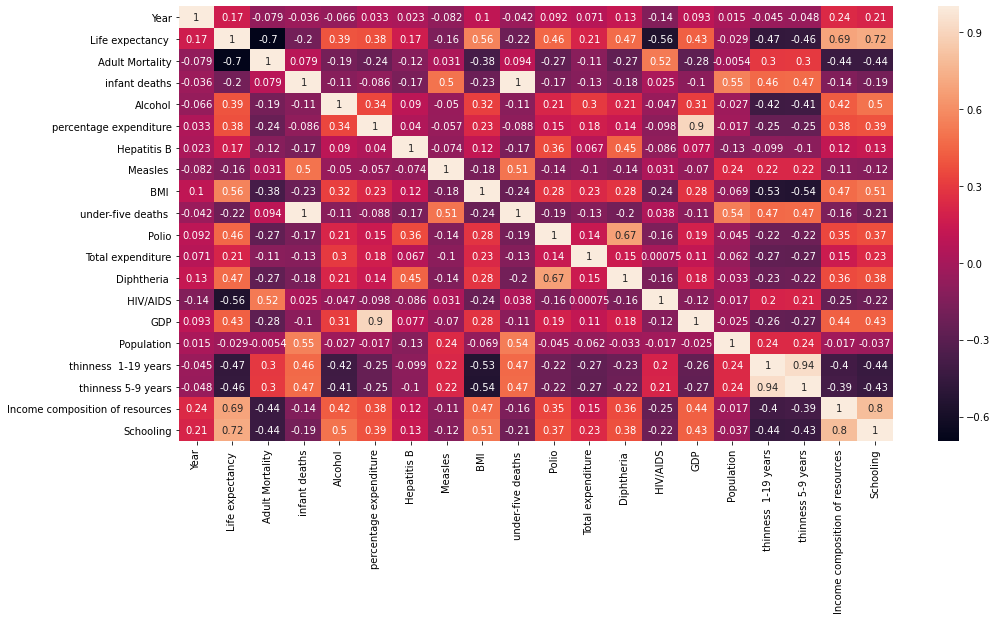

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(life.corr(),annot=True)
plt.show()

***Seperating the features which are weakly correlated with target variable.***

In [14]:
low_corr_col = []
corr  = life.corr()
corr_target = abs(corr['Life expectancy '])
low_corr_col = corr_target[corr_target<0.3].index
low_corr_col

Index(['Year', 'infant deaths', 'Hepatitis B', 'Measles ',
       'under-five deaths ', 'Total expenditure', 'Population'],
      dtype='object')

***Getting the columns which are multicollinear***

In [15]:
high_corr = []
corr_mat = life.drop('Life expectancy ',axis=1).corr()
for i in corr_mat:
    corr_var = abs(corr_mat[i])
    high_var = corr_var[corr_var>0.5].index
    for j in high_var:
        if j not in high_corr and j!=i and j not in low_corr_col:
            high_corr.append(j)
    corr_mat.drop(i,axis=1,inplace=True)
    corr_mat.drop(i,axis=0,inplace=True)


In [16]:
high_corr

[' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Schooling',
 'Diphtheria ']

***Relation between status and life expectancy***

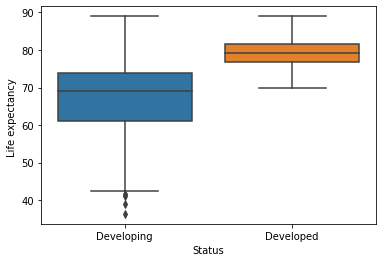

In [17]:
sns.boxplot(x= 'Status',y='Life expectancy ',data=life)

In [18]:
 life['Status'] = life['Status'].map({'Developing':0,'Developed':1}) #binary mapping of status variable (converted to integer)

***Dropping weakly correlated and multicollinear columns***

In [19]:
life.drop(low_corr_col,axis=1,inplace=True)
life.drop(high_corr,axis=1,inplace=True)
X = pd.DataFrame(life.drop('Life expectancy ',axis=1)) # Dividing the input and output variables.
y = life['Life expectancy ']
X.head()

,Country,Status,Adult Mortality,Alcohol,percentage expenditure,BMI,Polio,Income composition of resources
0,Afghanistan,0,263.0,0.01,71.279624,19.1,6.0,0.479
1,Afghanistan,0,271.0,0.01,73.523582,18.6,58.0,0.476
2,Afghanistan,0,268.0,0.01,73.219243,18.1,62.0,0.470
3,Afghanistan,0,272.0,0.01,78.184215,17.6,67.0,0.463
4,Afghanistan,0,275.0,0.01,7.097109,17.2,68.0,0.454


***Maintaining lists of numerical and categorical columns.***

In [20]:
num_cols = []
cat_cols = []
for i in X.columns:
    if X[i].dtype == 'float' or X[i].dtype == 'int':
        num_cols.append(i)
    elif X[i].dtype == 'object':
        cat_cols.append(i)
print(num_cols)
print(cat_cols)

['Adult Mortality', 'Alcohol', 'percentage expenditure', ' BMI ', 'Polio', 'Income composition of resources']
['Country']


***Creating dummies for categorical variables.***

In [21]:
dum = pd.get_dummies(X[cat_cols])
X = pd.concat([X,dum],axis=1)
X.drop(cat_cols,axis=1,inplace=True)

### Train-test Split.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2049, 190)
(879, 190)
(2049,)
(879,)


### Scaling the train data.

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])

In [24]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
model_1 = sm.OLS(y_train,X_train_sm).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     149.2
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:32:39   Log-Likelihood:                -4690.6
No. Observations:                2049   AIC:                             9759.
Df Residuals:                    1860   BIC:                         1.082e+04
Df Model:                         188                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           63.1630      0.449    140.631      0.000      62.282      64.044
Status                                                          10.7456      0.308     34.906      0.000      10.142      11.349
Adult Mortality                                                 -3.6887      0.514     -7.171      0.000      -4.698      -2.680
Alcohol                                                         -3.7884      0.631     -6.001      0.000      -5.026      -2.550
percentage expenditure                                           1.8927      0.839      2.256      0.024       0.247       3.538
 BMI                                                             0.4921      0.362      1.359      0.174      -0.218       1.202
Polio                                                            1.5839      0.315      5.032      0.000       0.967       2.201
Income composition of resources                                  6.1390      0.504     12.183      0.000       5.151       7.127
Country_Afghanistan                                             -6.4933      0.971     -6.687      0.000      -8.398      -4.589
Country_Albania                                                  6.9887      0.896      7.802      0.000       5.232       8.746
Country_Algeria                                                  4.8050      0.767      6.268      0.000       3.301       6.308
Country_Angola                                                 -15.4925      0.775    -19.992      0.000     -17.012     -13.973
Country_Antigua and Barbuda                                      9.1955      0.744     12.354      0.000       7.736      10.655
Country_Argentina                                                7.1622      0.785      9.129      0.000       5.623       8.701
Country_Armenia                                                  5.2869      0.673      7.854      0.000       3.967       6.607
Country_Australia                                                1.9917      0.823      2.419      0.016       0.377       3.607
Country_Austria                                                  2.9173      0.674      4.330      0.000       1.596       4.239
Country_Azerbaijan                                               2.3364      0.733      3.190      0.001       0.900       3.773
Country_Bahamas                                                  6.9509      1.059      6.565      0.000       4.875       9.027
Country_Bahrain                                                  6.0295      0.770      7.830      0.000       4.519       7.540
Country_Bangladesh                                               1.9554      0.691      2.829      0.005       0.600

Calculating r2-score on train data.

In [25]:
from sklearn.metrics import r2_score
y_train_pred = model_1.predict(X_train_sm)
print(r2_score(y_train,y_train_pred))

0.9378073717778639


### Scaling and calculating r2-score on test data.

In [26]:
X_test[num_cols] = sc.transform(X_test[num_cols])
X_test_sm = sm.add_constant(X_test)
y_test_pred= model_1.predict(X_test_sm)
print(r2_score(y_test,y_test_pred))

0.9276656648875181


We'll try to optimize the model by removing the features having pvalue greater than 0.05

In [27]:
pval_df = pd.DataFrame(model_1.pvalues)
pval_df.reset_index(inplace=True)
pval_df.columns = ['col_names','p_value']
pval_df['p_value']  = pval_df['p_value'].round(4)
pval_df.head()

,col_names,p_value
0,const,0.0000
1,Status,0.0000
2,Adult Mortality,0.0000
3,Alcohol,0.0000
4,percentage expenditure,0.0242


In [28]:
high_pval = pval_df['col_names'][pval_df['p_value']>0.05]
high_pval

5                                               BMI 
27          Country_Bolivia (Plurinational State of)
49                                    Country_Cyprus
50                                   Country_Czechia
52     Country_Democratic People's Republic of Korea
54                                   Country_Denmark
64                                      Country_Fiji
77                                    Country_Guyana
82                                     Country_India
83                                 Country_Indonesia
86                                   Country_Ireland
92                                Country_Kazakhstan
94                                  Country_Kiribati
104                               Country_Luxembourg
110                                    Country_Malta
114         Country_Micronesia (Federated States of)
121                                    Country_Nepal
122                              Country_Netherlands
123                              Country_New Z

Dropping columns with high pvalues and re-built the model.

In [29]:
X_train2 = X_train.drop(high_pval,axis=1)
X_train2.head()

,Status,Adult Mortality,Alcohol,percentage expenditure,Polio,Income composition of resources,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,...,Country_United Arab Emirates,Country_United Kingdom of Great Britain and Northern Ireland,Country_United Republic of Tanzania,Country_Uruguay,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe
1482,0,0.875346,0.154913,0.000481,0.875000,0.464135,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2899,0,0.333795,0.001734,0.000000,0.781250,0.501055,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
273,0,0.347645,0.000000,0.004719,0.739583,0.501055,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2483,0,0.033241,0.257803,0.021934,0.843750,0.708861,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
448,0,0.156510,0.217341,0.000000,0.937500,0.681435,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
X_train2_sm = sm.add_constant(X_train2)
model_2 = sm.OLS(y_train,X_train2_sm).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     172.2
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:32:39   Log-Likelihood:                -4709.1
No. Observations:                2049   AIC:                             9744.
Df Residuals:                    1886   BIC:                         1.066e+04
Df Model:                         162                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           63.0821      0.436    144.785      0.000      62.228      63.937
Status                                                          11.2169      0.379     29.608      0.000      10.474      11.960
Adult Mortality                                                 -3.5662      0.512     -6.963      0.000      -4.571      -2.562
Alcohol                                                         -3.7023      0.521     -7.106      0.000      -4.724      -2.681
percentage expenditure                                           1.9851      0.739      2.686      0.007       0.536       3.434
Polio                                                            1.6628      0.307      5.414      0.000       1.060       2.265
Income composition of resources                                  6.5865      0.464     14.181      0.000       5.676       7.497
Country_Afghanistan                                             -6.5920      0.986     -6.682      0.000      -8.527      -4.657
Country_Albania                                                  6.9489      0.914      7.599      0.000       5.156       8.742
Country_Algeria                                                  4.7591      0.784      6.067      0.000       3.221       6.298
Country_Angola                                                 -15.6225      0.799    -19.542      0.000     -17.190     -14.055
Country_Antigua and Barbuda                                      9.1680      0.765     11.989      0.000       7.668      10.668
Country_Argentina                                                7.0680      0.800      8.836      0.000       5.499       8.637
Country_Armenia                                                  5.2046      0.698      7.459      0.000       3.836       6.573
Country_Australia                                                1.3842      0.873      1.586      0.113      -0.328       3.096
Country_Austria                                                  2.2798      0.721      3.164      0.002       0.867       3.693
Country_Azerbaijan                                               2.2925      0.753      3.045      0.002       0.816       3.769
Country_Bahamas                                                  6.8923      1.067      6.459      0.000       4.800       8.985
Country_Bahrain                                                  5.9302      0.790      7.510      0.000       4.382       7.479
Country_Bangladesh                                               1.7696      0.701      2.524      0.012       0.395       3.144
Country_Barbados                                                 6.7038      0.927      7.233      0.000       4.886

In [31]:
y_train_pred2 = model_2.predict(X_train2_sm)
print(r2_score(y_train,y_train_pred2))

0.9366721885048603


In [32]:
X_test2 = X_test.drop(high_pval,axis=1)
X_test2_sm = sm.add_constant(X_test2)
y_test_pred2 = model_2.predict(X_test2_sm)
print(r2_score(y_test,y_test_pred2))

0.9272253127444349


Let's iterate the above procedure until we get a pvalue below 0.05 for all the variables.

In [33]:
pval_df = pd.DataFrame(model_2.pvalues)
pval_df.reset_index(inplace=True)
pval_df.columns = ['col_names','p_val']
pval_df['p_val'] = pval_df['p_val'].round(4)
pval_df.head()

,col_names,p_val
0,const,0.0000
1,Status,0.0000
2,Adult Mortality,0.0000
3,Alcohol,0.0000
4,percentage expenditure,0.0073


In [34]:
high_p = pval_df['col_names'][pval_df['p_val']>0.05]
high_p

14       Country_Australia
22         Country_Belgium
25          Country_Bhutan
63         Country_Germany
108         Country_Norway
116       Country_Portugal
131       Country_Slovenia
140         Country_Sweden
141    Country_Switzerland
Name: col_names, dtype: object

In [35]:
X_train3 = X_train2.drop(high_p,axis=1)
X_train3_sm = sm.add_constant(X_train3)
model_3 = sm.OLS(y_train,X_train3_sm).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     181.4
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:32:40   Log-Likelihood:                -4718.8
No. Observations:                2049   AIC:                             9746.
Df Residuals:                    1895   BIC:                         1.061e+04
Df Model:                         153                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           63.1809      0.425    148.638      0.000      62.347      64.015
Status                                                          11.7149      0.353     33.213      0.000      11.023      12.407
Adult Mortality                                                 -3.5295      0.513     -6.882      0.000      -4.535      -2.524
Alcohol                                                         -3.6743      0.506     -7.255      0.000      -4.668      -2.681
percentage expenditure                                           2.1539      0.710      3.035      0.002       0.762       3.546
Polio                                                            1.7125      0.307      5.582      0.000       1.111       2.314
Income composition of resources                                  6.4664      0.450     14.363      0.000       5.583       7.349
Country_Afghanistan                                             -6.6712      0.987     -6.761      0.000      -8.606      -4.736
Country_Albania                                                  6.8783      0.916      7.507      0.000       5.081       8.675
Country_Algeria                                                  4.6933      0.785      5.977      0.000       3.153       6.233
Country_Angola                                                 -15.7112      0.800    -19.641      0.000     -17.280     -14.142
Country_Antigua and Barbuda                                      9.0526      0.765     11.839      0.000       7.553      10.552
Country_Argentina                                                6.9972      0.801      8.734      0.000       5.426       8.568
Country_Armenia                                                  5.1364      0.699      7.349      0.000       3.766       6.507
Country_Austria                                                  1.6850      0.702      2.399      0.017       0.307       3.063
Country_Azerbaijan                                               2.2355      0.754      2.965      0.003       0.757       3.714
Country_Bahamas                                                  6.8233      1.069      6.386      0.000       4.728       8.919
Country_Bahrain                                                  5.8734      0.791      7.424      0.000       4.322       7.425
Country_Bangladesh                                               1.6824      0.700      2.403      0.016       0.309       3.055
Country_Barbados                                                 6.6472      0.928      7.159      0.000       4.826       8.468
Country_Belarus                                                  4.0303      0.778      5.178      0.000       2.504

In [36]:
y_train_pred3 = model_3.predict(X_train3_sm)
print(r2_score(y_train,y_train_pred3))

0.9360702712724732


In [37]:
X_test3 = X_test2.drop(high_p,axis=1)
X_test3_sm = sm.add_constant(X_test3)
y_test_pred3 = model_3.predict(X_test3_sm)
print(r2_score(y_test,y_test_pred3))

0.9274721361520517


In [38]:
pval_df = pd.DataFrame(model_3.pvalues)
pval_df.reset_index(inplace=True)
pval_df.columns = ['col_names','p_val']
pval_df['p_val'] = pval_df['p_val'].round(4)
pval_df.head()

,col_names,p_val
0,const,0.0000
1,Status,0.0000
2,Adult Mortality,0.0000
3,Alcohol,0.0000
4,percentage expenditure,0.0024


In [39]:
high_p = pval_df['col_names'][pval_df['p_val']>0.05]
high_p

75     Country_Japan
128    Country_Spain
Name: col_names, dtype: object

In [40]:
X_train4 = X_train3.drop(high_p,axis=1)
X_train4_sm = sm.add_constant(X_train4)
model_4 = sm.OLS(y_train,X_train4_sm).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Life expectancy    R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     183.3
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:32:41   Log-Likelihood:                -4722.4
No. Observations:                2049   AIC:                             9749.
Df Residuals:                    1897   BIC:                         1.060e+04
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                           63.1741      0.426    148.454      0.000      62.340      64.009
Status                                                          11.8760      0.347     34.208      0.000      11.195      12.557
Adult Mortality                                                 -3.5337      0.513     -6.882      0.000      -4.541      -2.527
Alcohol                                                         -3.7243      0.504     -7.382      0.000      -4.714      -2.735
percentage expenditure                                           2.1393      0.710      3.014      0.003       0.747       3.531
Polio                                                            1.7247      0.307      5.616      0.000       1.122       2.327
Income composition of resources                                  6.4756      0.451     14.368      0.000       5.592       7.360
Country_Afghanistan                                             -6.6712      0.988     -6.753      0.000      -8.609      -4.734
Country_Albania                                                  6.8812      0.917      7.501      0.000       5.082       8.680
Country_Algeria                                                  4.6840      0.786      5.958      0.000       3.142       6.226
Country_Angola                                                 -15.6968      0.801    -19.601      0.000     -17.267     -14.126
Country_Antigua and Barbuda                                      9.0664      0.765     11.845      0.000       7.565      10.567
Country_Argentina                                                7.0092      0.802      8.740      0.000       5.436       8.582
Country_Armenia                                                  5.1371      0.700      7.341      0.000       3.765       6.510
Country_Austria                                                  1.5491      0.701      2.209      0.027       0.174       2.925
Country_Azerbaijan                                               2.2295      0.755      2.954      0.003       0.749       3.710
Country_Bahamas                                                  6.8404      1.070      6.395      0.000       4.743       8.938
Country_Bahrain                                                  5.8668      0.792      7.406      0.000       4.313       7.420
Country_Bangladesh                                               1.6737      0.701      2.388      0.017       0.299       3.048
Country_Barbados                                                 6.6625      0.930      7.168      0.000       4.839       8.485
Country_Belarus                                                  4.0573      0.779      5.209      0.000       2.530

In [41]:
y_train_pred4 = model_4.predict(X_train4_sm)
print(r2_score(y_train,y_train_pred4))

0.9358489692705731


In [42]:
X_test4 = X_test3.drop(high_p,axis=1)
X_test4_sm = sm.add_constant(X_test4)
y_test_pred4 = model_4.predict(X_test4_sm)
print(r2_score(y_test,y_test_pred4))

0.9271672858589926


In [43]:
pval_df = pd.DataFrame(model_4.pvalues)
pval_df.reset_index(inplace=True)
pval_df.columns = ['col_names','p_val']
pval_df['p_val'] = pval_df['p_val'].round(4)
pval_df.head()

,col_names,p_val
0,const,0.0000
1,Status,0.0000
2,Adult Mortality,0.0000
3,Alcohol,0.0000
4,percentage expenditure,0.0026


In [44]:
high_p = pval_df['col_names'][pval_df['p_val']>0.05]
high_p

Series([], Name: col_names, dtype: object)

## The final r2-score of both train and test data is 93%